Comparing Image Data Structures

In [1]:
# OpenCV supports reading of images in most file formats, such as JPEG, PNG, and TIFF. Most image and 
# video analysis requires converting images into grayscale first. This simplifies the image and reduces 
# noise allowing for improved analysis. Let's write some code that reads an image of as person, Floyd 
# Mayweather and converts it into greyscale.

# First we will import the open cv package cv2 
import cv2 as cv
# We'll load the floyd.jpg image 
img = cv.imread('readonly/floyd.jpg')
# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Now, before we get to the result, lets talk about docs. Just like tesseract, opencv is an external
# package written in C++, and the docs for python are really poor. This is unfortunatly quite common
# when python is being used as a wrapper. Thankfully, the web docs for opencv are actually pretty good,
# so hit the website docs.opencv.org when you want to learn more about a particular function. In this
# case cvtColor converts from one color space to another, and we are convering our image to grayscale.
# Of course, we already know at least two different ways of doing this, using binarization and PIL
# color spaces conversions

# Lets instpec this object that has been returned.
import inspect
inspect.getmro(type(gray))

(numpy.ndarray, object)

In [2]:
# We see that it is of type ndarray, which is a fundamental list type coming from the numerical
# python project. That's a bit surprising - up until this point we have been used to working with
# PIL.Image objects. OpenCV, however, wants to represent an image as a two dimensional sequence 
# of bytes, and the ndarray, which stands for n dimensional array, is the ideal way to do this.
# Lets look at the array contents.
gray

array([[ 40,  39,  39, ...,  77,  76,  75],
       [ 43,  42,  42, ...,  76,  75,  75],
       [ 39,  39,  39, ...,  76,  75,  74],
       ...,
       [ 21,  22,  24, ..., 219, 223, 209],
       [ 18,  20,  22, ..., 196, 206, 196],
       [ 16,  18,  20, ..., 168, 182, 176]], dtype=uint8)

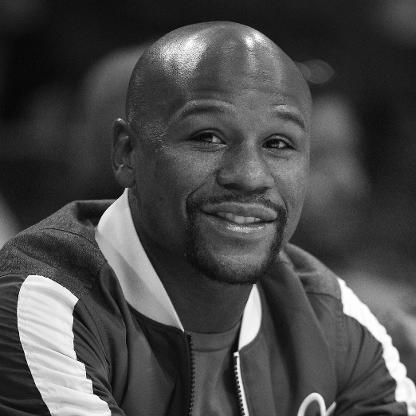

In [3]:
# The array is shown here as a list of lists, where the inner lists are filled with integers.
# The dtype=uint8 definition indicates that each of the items in an array is an 8 bit unsigned
# integer, which is very common for black and white images. So this is a pixel by pixel definition
# of the image.
#
# The display package, however, doesn't know what to do with this image. So lets convert it
# into a PIL object to render it in the browser.
from PIL import Image

# PIL can take an array of data with a given color format and convert this into a PIL object.
# This is perfect for our situation, as the PIL color mode, "L" is just an array of luminance
# values in unsigned integers
image = Image.fromarray(gray, "L")
display(image)

In [4]:
# Lets talk a bit more about images for a moment. Numpy arrays are multidimensional. For 
# instance, we can define an array in a single dimension:
import numpy as np
single_dim = np.array([25, 50 , 25, 10, 10])

# In an image, this is analagous to a single row of 5 pixels each in grayscale. But actually,
# all imaging libraries tend to expect at least two dimensions, a width and a height, and to
# show a matrix. So if we put the single_dim inside of another array, this would be a two
# dimensional array with element in the height direction, and five in the width direction
double_dim = np.array([single_dim])

double_dim

array([[25, 50, 25, 10, 10]])

In [5]:
# This should look pretty familiar, it's a lot like a list of lists! Lets see what this new
# two dimensional array looks like if we display it
display(Image.fromarray(double_dim, "L"))

In [6]:
# Pretty unexciting - it's just a little line. Five pixels in a row to be exact, of different
# levels of black. The numpy library has a nice attribute called shape that allows us to see how
# many dimensions big an array is. The shape attribute returns a tuple that shows the height of
# the image, by the width of the image
double_dim.shape

(1, 5)

In [7]:
# Lets take a look at the shape of our initial image which we loaded into the img variable
img.shape

(416, 416, 3)

In [8]:
# This image has three dimensions! That's because it has a width, a height, and what's called
# a color depth. In this case, the color is represented as an array of three values. Lets take a 
# look at the color of the first pixel
first_pixel=img[0][0]
first_pixel

array([33, 35, 53], dtype=uint8)

In [ ]:
# Here we see that the color value is provided in full RGB using an unsigned integer. This
# means that each color can have one of 256 values, and the total number of unique colors
# that can be represented by this data is 256 * 256 *256 which is roughly 16 million colors.
# We call this 24 bit color, which is 8+8+8.
#
# If you find yourself shopping for a television, you might notice that some expensive models
# are advertised as having 10 bit or even 12 bit panels. These are televisions where each of
# the red, green, and blue color channels are represented by 10 or 12 bits instead of 8. For
# ten bit panels this means that there are 1 billion colors capable, and 12 bit panels are
# capable of over 68 billion colors!

In [9]:
# We're not going to talk much more about color in this course, but it's a fun subject. Instead,
# lets go back to this array representation of images, because we can do some interesting things
# with this.
#
# One of the most common things to do with an ndarray is to reshape it -- to change the number
# of rows and columns that are represented so that we can do different kinds of operations.
# Here is our original two dimensional image
print("Original image")
print(gray)
# If we wanted to represent that as a one dimensional image, we just call reshape
print("New image")
# And reshape takes the image as the first parameter, and a new shape as the second
image1d=np.reshape(gray,(1,gray.shape[0]*gray.shape[1]))
print(image1d)

Original image
[[ 40  39  39 ...  77  76  75]
 [ 43  42  42 ...  76  75  75]
 [ 39  39  39 ...  76  75  74]
 ...
 [ 21  22  24 ... 219 223 209]
 [ 18  20  22 ... 196 206 196]
 [ 16  18  20 ... 168 182 176]]
New image
[[ 40  39  39 ... 168 182 176]]


In [11]:
# So, why are we talking about these nested arrays of bytes, we were supposed to be talking
# about OpenCV as a library. Well, I wanted to show you that often libraries working on the
# same kind of principles, in this case images stored as arrays of bytes, are not representing
# data in the same way in their APIs. But, by exploring a bit you can learn how the internal
# representation of data is stored, and build routines to convert between formats.
#
# For instance, remember in the last lecture when we wanted to look for gaps in an image so
# that we could draw lines to feed into kraken? Well, we use PIL to do this, using getpixel()
# to look at individual pixels and see what the luminosity was, then ImageDraw.rectangle to
# actually fill in a black bar separator. This was a nice high level API, and let us write
# routines to do the work we wanted without having to understand too much about how the images
# were being stored. But it was computationally very slow.
#
# Instead, we could write the code to do this using matrix features within numpy. Lets take
# a look.
import cv2 as cv
# We'll load the 2 column image
img = cv.imread('readonly/two_col.png')
# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [12]:
# Now, remember how slicing on a list works, if you have a list of number such as 
# a=[0,1,2,3,4,5] then a[2:4] will return the sublist of numbers at position 2 through 4 
# inclusive - don't forget that lists start indexing at 0!
# If we have a two dimensional array, we can slice out a smaller piece of that using the
# format a[2:4,1:3]. You can think of this as first slicing along the rows dimension, then
# in the columns dimension. So in this example, that would be a matrix of rows 2, and 3,
# and columns 1, and 2. Here's a look at our image.
gray[2:4,1:3]

array([[255, 255],
       [255, 255]], dtype=uint8)

In [13]:
# So we see that it is all white. We can use this as a "window" and move it around our
# our big image.
#
# Finally, the ndarray library has lots of matrix functions which are generally very fast
# to run. One that we want to consider in this case is count_nonzero(), which just returns
# the number of entries in the matrix which are not zero.
np.count_nonzero(gray[2:4,1:3])

4

In [14]:
# Ok, the last benefit of going to this low level approach to images is that we can change
# pixels very fast as well. Previously we were drawing rectangles and setting a fill and line
# width. This is nice if you want to do something like change the color of the fill from the
# line, or draw complex shapes. But we really just want a line here. That's really easy to
# do - we just want to change a number of luminosity values from 255 to 0.
#
# As an example, lets create a big white matrix
white_matrix=np.full((12,12),255,dtype=np.uint8)
display(Image.fromarray(white_matrix,"L"))
white_matrix

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [15]:
# looks pretty boring, it's just a giant white square we can't see. But if we want, we can
# easily color a column to be black
white_matrix[:,6]=np.full((1,12),0,dtype=np.uint8)
display(Image.fromarray(white_matrix,"L"))
white_matrix

array([[255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [ ]:
# And that's exactly what we wanted to do. So, why do it this way, when it seems so much
# more low level? Really, the answer is speed. This paradigm of using matricies to store
# and manipulate bytes of data for images is much closer to how low level API and hardware
# developers think about storing files and bytes in memory.
#
# How much faster is it? Well, that's up to you to discover; there's an optional assignment
# for this week to convert our old code over into this new format, to compare both the
# readability and speed of the two different approaches.